In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = np.loadtxt("data/outside.csv", delimiter=",",skiprows=1)

print("First 10 rows: \n\n",data[:10,],"\n\n")

X_train = data[:,:-1]
y_train = data[:,-1]


'''
Feature 1: Whether it is raining or not (1 if it is raining, 0 otherwise)
Feature 2: Whether the temperature is above 50 degrees Fahrenheit or not (1 if it is, 0 otherwise)
Feature 3: Whether it is windy or not (1 if it is windy, 0 otherwise)
Feature 4: Whether the day is a weekday or not (1 if it is a weekday, 0 otherwise)
Target: Whether a person goes outside or not (1 if they do, 0 otherwise)
'''

First 10 rows: 

 [[0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0.]] 




'\nFeature 1: Whether it is raining or not (1 if it is raining, 0 otherwise)\nFeature 2: Whether the temperature is above 50 degrees Fahrenheit or not (1 if it is, 0 otherwise)\nFeature 3: Whether it is windy or not (1 if it is windy, 0 otherwise)\nFeature 4: Whether the day is a weekday or not (1 if it is a weekday, 0 otherwise)\nTarget: Whether a person goes outside or not (1 if they do, 0 otherwise)\n'

       is_raining  temperature_above_50    is_windy  is_weekday  goes_outside
count      100.00            100.000000  100.000000  100.000000    100.000000
mean         0.45              0.510000    0.460000    0.580000      0.420000
std          0.50              0.502418    0.500908    0.496045      0.496045
min          0.00              0.000000    0.000000    0.000000      0.000000
25%          0.00              0.000000    0.000000    0.000000      0.000000
50%          0.00              1.000000    0.000000    1.000000      0.000000
75%          1.00              1.000000    1.000000    1.000000      1.000000
max          1.00              1.000000    1.000000    1.000000      1.000000
                      is_raining  temperature_above_50  is_windy  is_weekday  \
is_raining              1.000000             -0.038199 -0.068562    0.118106   
temperature_above_50   -0.038199              1.000000  0.101947   -0.104568   
is_windy               -0.068562              0.101947  1.

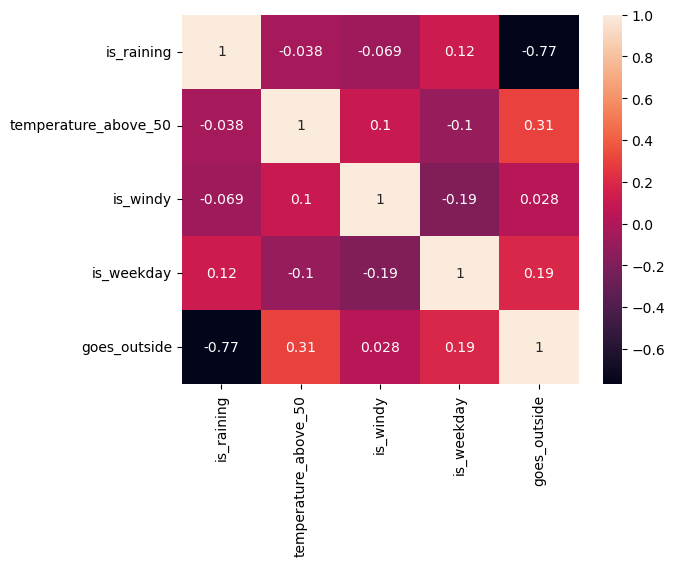

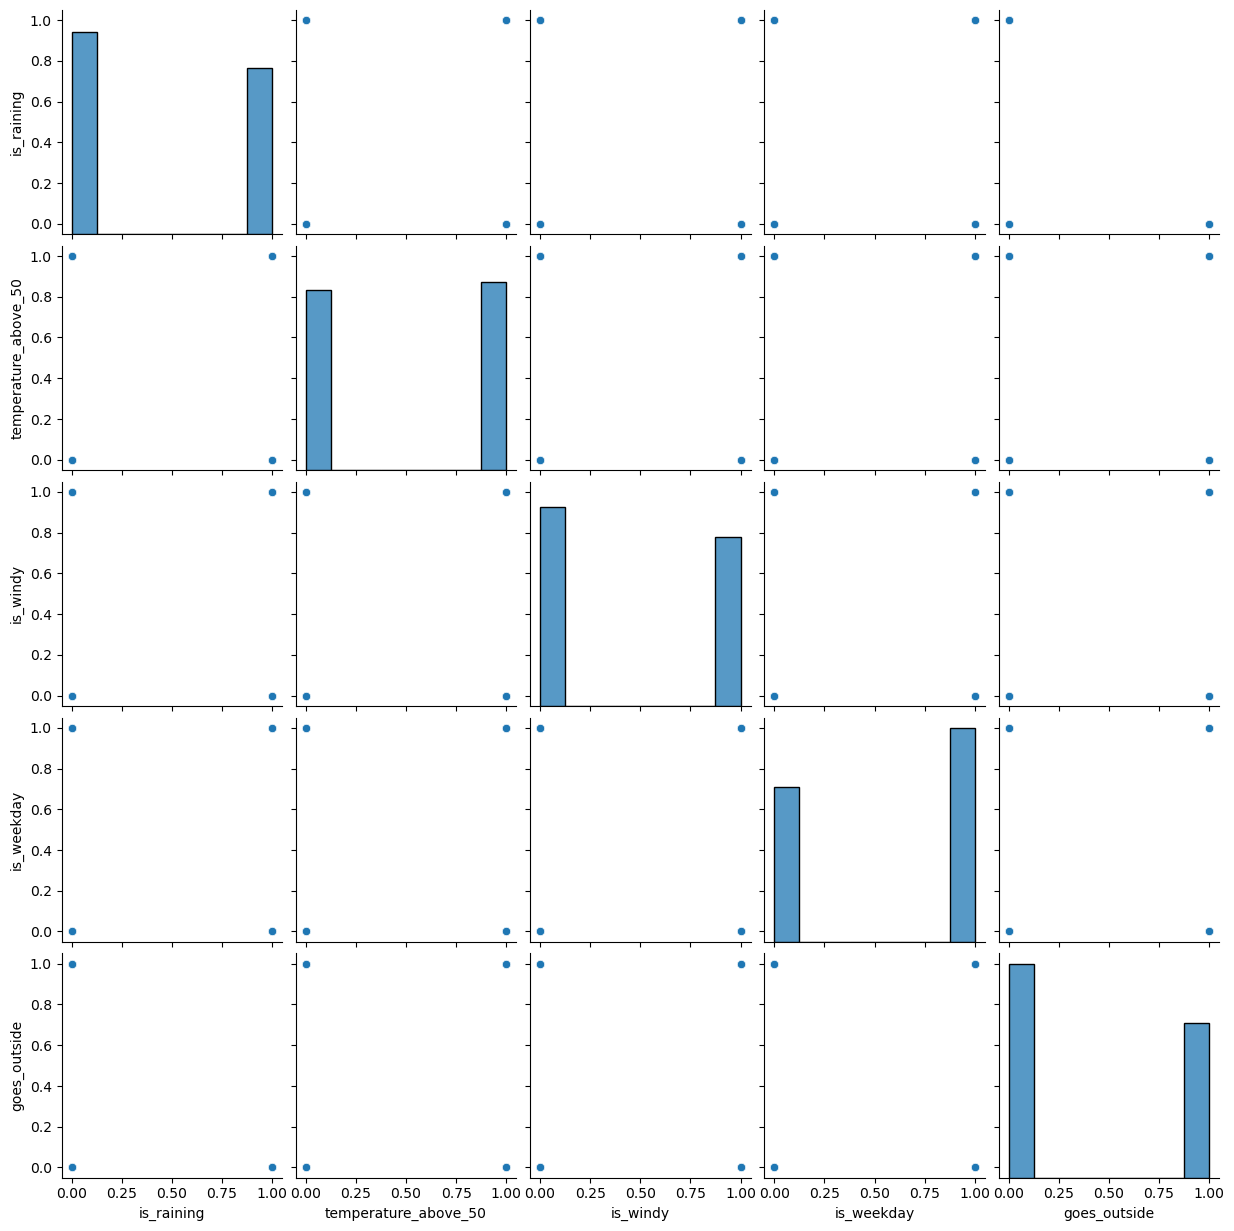

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the data
df = pd.read_csv('data/outside.csv')

# descriptive statistics
print(df.describe())

# correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

# pairplot
sns.pairplot(df)
plt.show()



In [4]:
def entropy(p):
    return 0 if p in {0, 1} else -p * np.log2(p) - (1 - p) * np.log2(1 - p)

In [5]:
#initial attempt -> build_gini_tree
'''
#option 1: 
def gini_criterion(X, y, left_subtree, right_subtree):
    if len(left_subtree) == 0:
        p_right = sum(y[right_subtree])/len(right_subtree)
        gini_right = 1 - (p_right**2 + (1 - p_right)**2)
        return gini_right
    
    elif len(right_subtree) == 0:
        p_left = sum(y[left_subtree])/len(left_subtree)
        gini_left = 1 - (p_left**2 + (1 - p_left)**2)
        return gini_left
    
    else:
        p_left, p_right = sum(y[left_subtree])/len(left_subtree), sum(y[right_subtree])/len(right_subtree)
        gini_left = 1 - (p_left**2 + (1 - p_left)**2)
        gini_right = 1 - (p_right**2 + (1 - p_right)**2)
        return len(left_subtree) / (len(left_subtree) + len(right_subtree)) * gini_left + len(right_subtree) / (len(left_subtree) + len(right_subtree)) * gini_right


'''
#option 2:
def gini_criterion(y, left_subtree, right_subtree):
    if len(left_subtree) != 0:
        p_left = sum(y[left_subtree])/len(left_subtree)
        gini_left = 2 * p_left * (1 - p_left)
    else:
        gini_left = 0

    if len(right_subtree) != 0:
        p_right = sum(y[right_subtree])/len(right_subtree)
        gini_right = 2 * p_right * (1 - p_right)
    else:
        gini_right = 0

    gini = len(left_subtree) / (len(left_subtree) + len(right_subtree)) * gini_left + len(right_subtree) / (len(left_subtree) + len(right_subtree)) * gini_right
    return gini




In [6]:
#passing X[subtree] to calculate for each feature in the subtree
def decision_node_split(X, feature_index): 
    #storing indices in the subtrees
    left_subtree = [i for i, x in enumerate(X) if x[feature_index] == 1]
    right_subtree = [i for i, x in enumerate(X) if x[feature_index] == 0]
    return left_subtree, right_subtree


In [8]:
#weighted entropy
def weighted_entropy(X,y,left_subtree,right_subtree):
    w_left, w_right = len(left_subtree)/len(X), len(right_subtree)/len(X)
    p_left, p_right = sum(y[left_subtree])/len(left_subtree), sum(y[right_subtree])/len(right_subtree)
    
    return w_left * entropy(p_left) + w_right * entropy(p_right)


In [7]:
#information_gain = root_entropy - weighted_entropy
def information_gain(X, y, left_subtree, right_subtree):
    root_node = sum(y)/len(y)
    root_entropy = entropy(root_node)
    return root_entropy - weighted_entropy(X,y,left_subtree, right_subtree)

In [9]:
df = pd.read_csv('data/outside.csv')

print("Information Gain - split at the root node:\n")
for i, feature_name in enumerate(df.keys().to_numpy()[:-1]):
    left_subtree, right_subtree = decision_node_split(X_train, i)
    information_gain_i = information_gain(X_train, y_train, left_subtree, right_subtree)
    print(f"{feature_name}: {information_gain_i:.2f}")
    

Information Gain - split at the root node:

is_raining: 0.55
temperature_above_50: 0.07
is_windy: 0.00
is_weekday: 0.03


In [10]:
#Tree_Node 
class Tree_Node:
    def __init__(self, indices, depth):
        self.indices = indices
        self.depth = depth
        self.left = None
        self.right = None
        self.feature_index = None
        self.is_leaf = False
        self.prediction = None
        self.gini = None
        self.entropy = None


In [20]:
def build_tree(X, y, depth, max_depth):
    indices = list(range(len(y)))
    
    #if max depth or len(set(y[indices])) == 1 (i.e pure)
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.entropy = entropy(node.prediction)
        return node

    
    best_gain = -np.inf
    best_split = None
    best_index = None

    #selecting the best feature to split on (GOAL -> MAXIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split(X[indices], feature_index)
    
        #continue if left_subtree or right_subtree is 0
        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = information_gain(X[indices],y[indices],left_subtree, right_subtree)
        
        #updating if a higher gain is found
        if gain > best_gain:
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index
    
    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.entropy = entropy(sum(y[indices]) / len(indices))
    node.left = build_tree(X[best_split[0]], y[best_split[0]], depth + 1, max_depth)
    node.right = build_tree(X[best_split[1]], y[best_split[1]], depth + 1, max_depth)

    return node

In [21]:
max_depth = 3
root = build_tree(X_train, y_train, 0, max_depth)

In [22]:
def print_tree(node, feature_names, depth=0):
    indent = "  " * depth
    if node.is_leaf:
        print(f"{indent}Leaf[Samples: {len(node.indices)} Prediction: {node.prediction} Entropy: {node.entropy}]")
    else:
        print(f"{indent}Node[Samples: {len(node.indices)} Feature: {feature_names[node.feature_index]}  Entropy: {node.entropy}]")
        print(f"{indent}Left:")
        print_tree(node.left, feature_names, depth + 1)
        print(f"{indent}Right:")
        print_tree(node.right, feature_names, depth + 1)

feature_names = df.keys().to_numpy()

print("Entropy: (compare it with sklearn.tree.plot_tree [random_state = 0] )\n")
print_tree(root, feature_names)



Entropy: (compare it with sklearn.tree.plot_tree [random_state = 0] )

Node[Samples: 100 Feature: is_raining  Entropy: 0.9814538950336535]
Left:
  Leaf[Samples: 45 Prediction: 0 Entropy: 0]
Right:
  Node[Samples: 55 Feature: temperature_above_50  Entropy: 0.7889406572966209]
  Left:
    Leaf[Samples: 29 Prediction: 1 Entropy: 0]
  Right:
    Node[Samples: 26 Feature: is_weekday  Entropy: 1.0]
    Left:
      Leaf[Samples: 13 Prediction: 1 Entropy: 0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Entropy: 0]


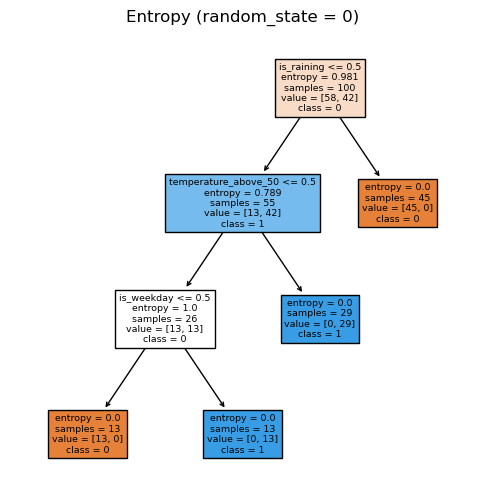

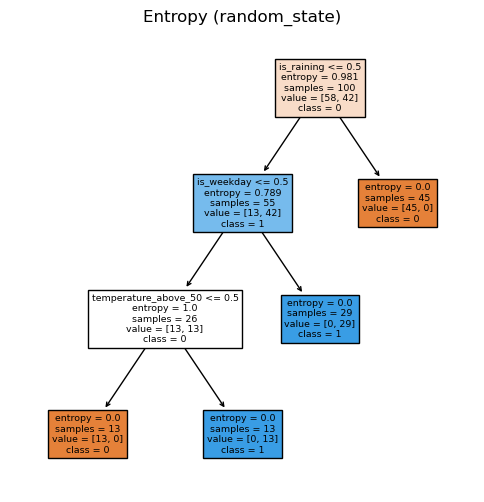

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
#----------------- random_state = 0
classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=0,criterion='entropy')
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(6,6))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Entropy (random_state = 0)")
plt.show()

#----------------- with random_state 

classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=15,criterion='entropy')
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(6,6))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Entropy (random_state)")
plt.show()


In [23]:
def build_tree_gini(X, y, depth, max_depth):
    indices = list(range(len(y)))
    
    #if max depth or len(set(y[indices])) == 1 (i.e pure)
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.gini = 0  # Gini impurity for leaf nodes is 0 considering it is pure
        return node

    best_gain = np.inf
    best_split = None
    best_index = None
    
    #selecting the best feature to split on (GOAL -> MINIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split(X[indices], feature_index)

        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = gini_criterion(y[indices],left_subtree, right_subtree)

        #updating if a lower gain is found
        if gain < best_gain:
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index

    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.gini = gain
    node.left = build_tree_gini(X[best_split[0]], y[best_split[0]], depth + 1, max_depth)
    node.right = build_tree_gini(X[best_split[1]], y[best_split[1]], depth + 1, max_depth)

    return node

In [25]:
print("Gini - split at the root node:\n")
for i, feature_name in enumerate(df.keys().to_numpy()[:-1]):
    left_subtree, right_subtree = decision_node_split(X_train, i)
    gini_i = gini_criterion(y_train, left_subtree, right_subtree)
    print(f"{feature_name}: {gini_i:.2f}")
    

Gini - split at the root node:

is_raining: 0.20
temperature_above_50: 0.44
is_windy: 0.49
is_weekday: 0.47


In [26]:
def print_tree_gini(node, feature_names, depth=0):
    indent = "  " * depth
    if node.is_leaf:
        print(f"{indent}Leaf[Samples: {len(node.indices)} Prediction: {node.prediction} Gini: {node.gini}]")
    else:
        print(f"{indent}Node[Samples: {len(node.indices)} Feature: {feature_names[node.feature_index]} Gini: {node.gini}]")
        print(f"{indent}Left:")
        print_tree_gini(node.left, feature_names, depth + 1)
        print(f"{indent}Right:")
        print_tree_gini(node.right, feature_names, depth + 1)

feature_names = df.keys().to_numpy()

root_gini = build_tree_gini(X_train, y_train, 0, max_depth)
print("Gini: (works but doesn't match with sklear.tree.plot_tree )\n")
print_tree_gini(root_gini, feature_names)



Gini: (works but doesn't match with sklear.tree.plot_tree )

Node[Samples: 100 Feature: is_raining Gini: 0.4695238095238095]
Left:
  Leaf[Samples: 45 Prediction: 0 Gini: 0]
Right:
  Node[Samples: 55 Feature: temperature_above_50 Gini: 0.23636363636363636]
  Left:
    Leaf[Samples: 29 Prediction: 1 Gini: 0]
  Right:
    Node[Samples: 26 Feature: is_weekday Gini: 0.0]
    Left:
      Leaf[Samples: 13 Prediction: 1 Gini: 0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Gini: 0]


In [27]:
#gini impurtity 
def gini_impurity(y):
    total_samples = len(y)
    class_counts = np.bincount(y.astype(int))
    class_probs = class_counts / total_samples
    gini = 1 - np.sum(class_probs**2)
    return gini

#gini_decrease -> impurity_decrease (MAXIMIZE)
def gini_decrease(y, left_subtree, right_subtree):
    initial_impurity = gini_impurity(y)
    
    gini_left = gini_impurity(y[left_subtree])
    gini_right = gini_impurity(y[right_subtree])

    total_samples = len(y)
    total_samples_left = len(left_subtree)
    total_samples_right = len(right_subtree)
    
    split_impurity = (total_samples_left / total_samples) * gini_left + (total_samples_right / total_samples) * gini_right

    impurity_decrease = initial_impurity - split_impurity

    return impurity_decrease


#decision_node_split (passing the original X)
def decision_node_split_advanced(X, indices, feature_index):
    left_subtree = [i for i in indices if X[i][feature_index] == 1]
    right_subtree = [i for i in indices if X[i][feature_index] == 0]
    return left_subtree, right_subtree

#build_tree_gini_advanced (passing original X and Y, indicies = subtree)
def build_tree_gini_advanced(X, y, indices, depth, max_depth):
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.gini = gini_impurity(y[indices])  
        return node

    best_gain = -np.inf  
    best_split = None
    best_index = None
    
    #calucluating gain for each feature (GOAL -> MAXIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split_advanced(X, indices, feature_index)


        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = gini_decrease(y, left_subtree, right_subtree)  

        if gain > best_gain:  # higher gini decrease is better
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index

    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.gini = gini_impurity(y[indices])
    node.left = build_tree_gini_advanced(X, y, best_split[0], depth + 1, max_depth)  
    node.right = build_tree_gini_advanced(X, y, best_split[1], depth + 1, max_depth) 
    return node


indices = list(range(len(y_train)))
root_gini_advanced = build_tree_gini_advanced(X_train, y_train, indices, 0, max_depth)

print("Gini: (matches with sklearn.tree.plot_tree [random_state = 0] )\n")
print_tree_gini(root_gini_advanced,feature_names)


Gini: (matches with sklearn.tree.plot_tree [random_state = 0] )

Node[Samples: 100 Feature: is_raining Gini: 0.4872000000000001]
Left:
  Leaf[Samples: 45 Prediction: 0 Gini: 0.0]
Right:
  Node[Samples: 55 Feature: temperature_above_50 Gini: 0.3609917355371901]
  Left:
    Leaf[Samples: 29 Prediction: 1 Gini: 0.0]
  Right:
    Node[Samples: 26 Feature: is_weekday Gini: 0.5]
    Left:
      Leaf[Samples: 13 Prediction: 1 Gini: 0.0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Gini: 0.0]


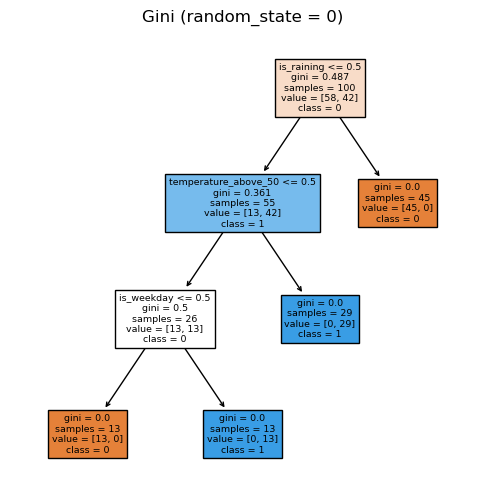

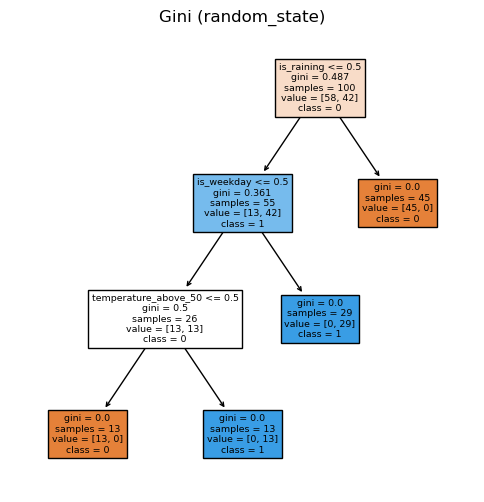

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
#----------------- random_state = 0
classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=0)
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(6,6))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state = 0)")
plt.show()

#----------------- with random_state 

classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=15)
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(6,6))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state)")
plt.show()
